We will be running the K-means clustering one the PCA set.
First we import all needed libraries.

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Next we load our .csv file.

In [4]:
data = pd.read_csv('principal_components.csv')

Using our PCA set from earlier we already know it is standaized allowing us to skip multiple steps.
We now set up the clustering and set how many different clusters we desire.

In [5]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)


For our sake we print the cluster centers so we have the points in data and visuals.

In [6]:
print(f'Cluster Centers:\n{kmeans.cluster_centers_}')

Cluster Centers:
[[-1.02231467 -0.51879354]
 [ 1.05199978 -0.54753936]
 [ 0.09810422  1.13118209]]


Now that we have set the clusters we have to set up and display the visual.

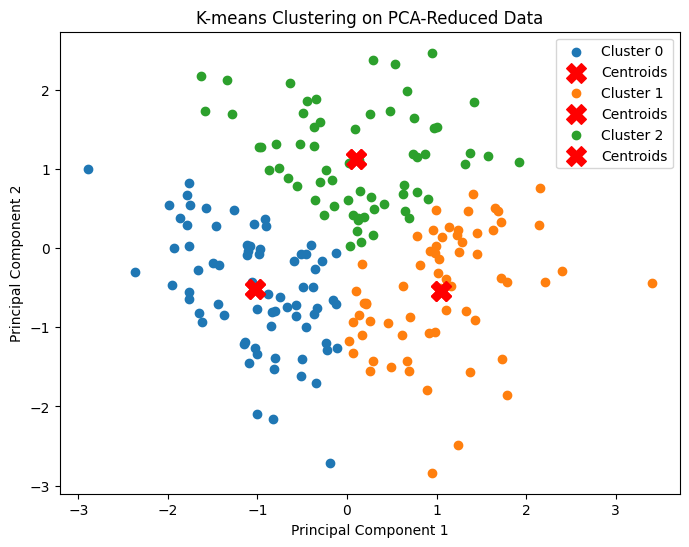

In [7]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Reduced Data')
plt.legend()
plt.show()

After having ran the visual we want to save our clustered set.

In [8]:
data.to_csv('clustered_data.csv', index=False)